## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### -Has the network latency gone up since we switched internet service providers?

#### - Null - Network latency has not changed or has decreased since we switched internet service providers

#### -alternative- Network latency has gone up since we switched internet service providers

#### -True positive- you test the network latency multiple times throughout the day and it does indeed seem like it has gone up since switching

#### - True Negative- After testing the network latency multiple times throughout different times of the day, it has proven that it has not gone up. 

#### - Type 1 error- we think that network latency has gone up when in reality it hasn't. it could be dependent on outside factors such as time of day, weather, ect. 

#### type 2 error- we think that network latency has remained the same when it has actually gone up. we could have tested when there wasn't much stress on the network, allowing for the latency to be less. 

### -Is the website redesign any good?

#### -null- the website redesign has not changed how easy it is for customers to use

#### - alternative - the website redesign made the website much more user friendly

#### - True positive - a poll was taken among the website users and an overwhelming majority prefer the new website design

#### - True negative- most website users don't prefer the website redesign, instead wishing the website was how it used to be. 

#### - Type 1 error- only a small portion of the population is asked and many dislike the redesign, when in reality a vast majority prefer the redesign

#### - Type 2 error- we believe the redesign is good, despite a majority of users disliking the redesign 

### - Is our television ad driving more sales?

In [1]:
%matplotlib inline
from math import sqrt

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from env import get_db_url


In [3]:
url = get_db_url("telco_churn")
sql = """
SELECT *
FROM customers
JOIN internet_service_types USING (internet_service_type_id)
"""

df = pd.read_sql(sql,url)
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,2,2,3,1,2,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,Yes,No,No,No phone service
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No,No internet service,Yes,No,No,Yes,Yes


### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

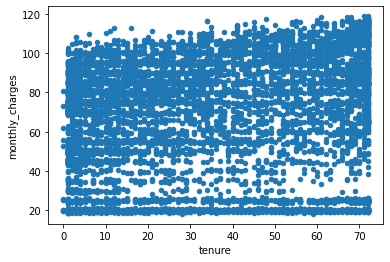

In [4]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)

df.plot.scatter('tenure' , 'monthly_charges')


In [5]:
alpha = 0.05

In [6]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r,p

(0.24789985628615263, 4.0940449914811555e-99)

In [7]:
if p < alpha:
    print ('reject null')
else:
    print('accept null')

reject null


#### Tenure doesn't seem to have a strong correlation with monthly charges. 

### 2 Is there a relationship between how long an employee has been with the company and their salary?

In [8]:
url = get_db_url("employees")
sql = """
SELECT salary, DATEDIFF(curdate(),hire_date) as 'days'
FROM salaries
JOIN employees USING (emp_no)
WHERE to_date > now()
"""

df = pd.read_sql(sql,url)


In [9]:
df.head()

,salary,days
0,88958,13102
1,72527,13319
2,43311,13039
3,74057,12944
4,94692,11928


In [10]:
alpha = .05
r, p = stats.pearsonr(df.days, df.salary)
print ('r = ', r )
print ('p = ' , p)

r =  0.30646256131860894
p =  0.0


In [11]:
if p < alpha:
    print ('reject null')
else:
    print('accept null')

reject null


### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [12]:
url = get_db_url("employees")
sql = """
SELECT emp_no,DATEDIFF(curdate(),hire_date) as 'days', count(*) as n_titles
FROM titles
JOIN employees USING (emp_no)
GROUP BY emp_no
"""

df= pd.read_sql(sql,url)
df.head()

,emp_no,days,n_titles
0,10001,13102,1
1,10002,13319,1
2,10003,13039,1
3,10004,12944,2
4,10005,11928,2


In [13]:
alpha = .05
r, p = stats.pearsonr(df.days, df.n_titles)
print ('r = ', r )
print ('p = ' , p)
if p < alpha:
    print ('reject null')
else:
    print('accept null')

r =  0.2665989299136427
p =  0.0
reject null


### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [14]:
import pydataset
sleep = pydataset.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

## CHI SQUARE

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [15]:
df = pd.read_excel (r'codeup_macbook.xlsx', sheet_name=0)
df

,Unnamed: 0,codeup_student,not_student
0,uses,49.0,20.0
1,doesn't_use,1.0,30.0


In [16]:
observed = pd.crosstab(df.codeup_student,df.not_student)
observed

not_student,20.0,30.0
codeup_student,,
1.0,0,1
49.0,1,0


In [17]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[0 1]
 [1 0]]
---
Expected

[[0.5 0.5]
 [0.5 0.5]]
---

chi^2 = 0.0000
p     = 1.0000


In [18]:
alpha = .05

In [19]:
if p < alpha:
    print("reject the null")
else:
    print("accept the null")

accept the null


### ALT METHOD 

In [20]:
index = ['uses', 'no_use']
columns = ['student','not_student']

df = pd.DataFrame([[49, 20] , [1, 30]], index = index, columns = columns)
n = df.values.sum()
n

100

In [21]:
observed = pd.crosstab(df.student, df.not_student)
observed

not_student,20,30
student,,
1,0,1
49,1,0


In [22]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 1]
 [1 0]]
---
Expected

[[0.5 0.5]
 [0.5 0.5]]
---

chi^2 = 0.0000
p     = 1.0000


In [23]:
if p < alpha:
    print('Reject the null')
else:
    print('Fail to reject the null')

Fail to reject the null


### ALT ALT METHOD

In [24]:
index = ['uses', 'no_use']
columns = ['student','not_student']

df = pd.DataFrame([[49, 20] , [1, 30]], index = index, columns = columns)
n = df.values.sum()
n

100

In [25]:
df 

,student,not_student
uses,49,20
no_use,1,30


In [26]:
# calculate the proportions

CodeUp = .5
Not_codeUp = .5
Uses_m=.69
No_use_m = .31

In [27]:
expected_proportions = pd.DataFrame([[.345, .345] , [.155, .155]], index = index, columns = columns)
x = expected_proportions.values.sum()
x

1.0

In [28]:
expected = pd.DataFrame([[34.5, 34.5] , [15.5, 15.5]], index = index, columns = columns)
expected_proportions = pd.DataFrame([[.345, .345] , [.155, .155]], index = index, columns = columns)
x = expected.values.sum()
x
expected

,student,not_student
uses,34.5,34.5
no_use,15.5,15.5


In [29]:
chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
not_student  20  30
student            
1             0   1
49            1   0
---
Expected
        student  not_student
uses       34.5         34.5
no_use     15.5         15.5
---

chi^2 = nan
p     = nan


In [30]:
stats.chi2_contingency([49,20],[1,30])

(0.0, 1.0, 0, array([49., 20.]))

### Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [31]:
from pydataset import data

In [32]:
mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4] # a little cleaning goes a long way
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


In [33]:
observed = pd.crosstab(mpg.transmission, mpg.year)
observed

year,1999,2008
transmission,,
auto,74,83
manual,43,34


In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[74 83]
 [43 34]]
---
Expected

[[78.5 78.5]
 [38.5 38.5]]
---

chi^2 = 1.2388
p     = 0.2657


### 3.Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [35]:
url = get_db_url("employees")
sql = """
SELECT gender, dept_name, emp_no
FROM employees
JOIN dept_emp USING (emp_no)
JOIN departments USING (dept_no)
WHERE to_date > now()
    AND dept_name IN ('Marketing' , 'Sales')
"""

df = pd.read_sql(sql,url)
df.head()

,gender,dept_name,emp_no
0,F,Marketing,10017
1,M,Marketing,10058
2,F,Marketing,10140
3,F,Marketing,10228
4,F,Marketing,10239


In [36]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [37]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


In [38]:
alpha = .05
if p < alpha:
    print("reject the null")
else:
    print("accept the null")

accept the null


### Is an employee's gender independent of whether or not they are or have been a manager?

In [39]:
url = get_db_url("employees")
sql = """
SELECT count(gender)
FROM dept_manager
JOIN employees USING (emp_no)
group by gender
"""

df = pd.read_sql(sql,url)
df.head()

,count(gender)
0,11
1,13


In [40]:
data = [['male', 11], ['female', 13]]

In [41]:
df = pd.DataFrame(data, columns = ['gender', 'manager'])

In [42]:
df

,gender,manager
0,male,11
1,female,13


In [43]:
observed = pd.crosstab(df.gender, df.manager)
observed

manager,11,13
gender,,
female,0,1
male,1,0


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 1]
 [1 0]]
---
Expected

[[0.5 0.5]
 [0.5 0.5]]
---

chi^2 = 0.0000
p     = 1.0000


In [45]:
if p < alpha:
    print('Reject the null')
else:
    print('Fail to reject the null')

Fail to reject the null


##### not expected result, should have done employees and joined dept managers

In [46]:
url = get_db_url("employees")
sql = """
SELECT *
FROM employees
LEFT JOIN dept_manager USING (emp_no)

"""

df = pd.read_sql(sql,url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None


In [47]:
df['is_manager']= np.where(df.dept_no.isnull(), False, True)

In [48]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,is_manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None,False
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None,False
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None,False
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None,False
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None,False


In [49]:
df.is_manager.nunique()

2

In [50]:
observed = pd.crosstab(df.gender, df.is_manager)
observed

is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]
---

chi^2 = 1.4567
p     = 0.2275


In [52]:
if p < alpha:
    print('Reject the null')
else:
    print('Fail to reject the null')

Fail to reject the null
